In [84]:
import numpy as np
import pylab as plt

# https://apertureos.com/off-axis/specifying-the-geometry-of-off-axis-parabolic-mirrors/

Open aperture:                1.613 m
Open aperture (cont'd):       1.754 m
Extra height of continuation: 0.160 m
Focus dist. from horn back:   0.857 m


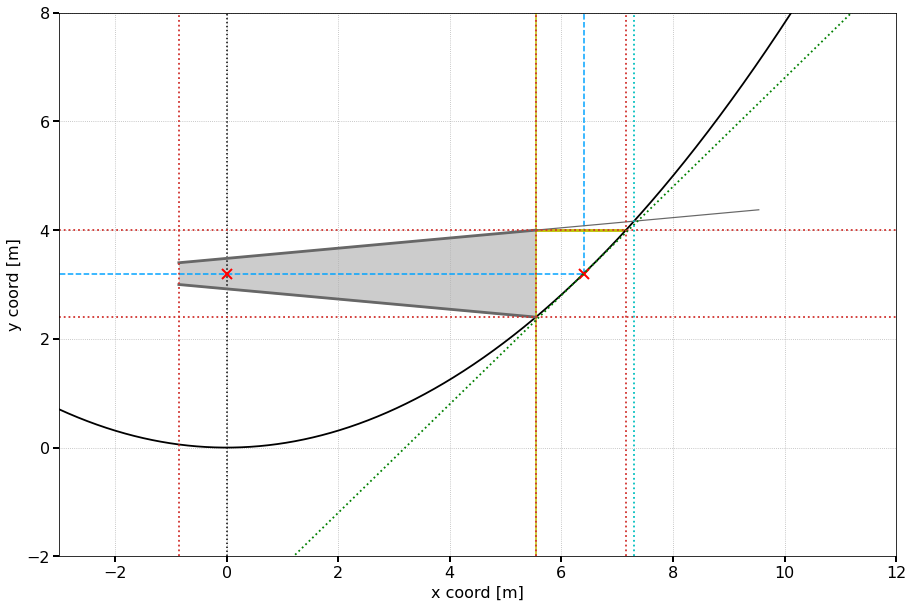

In [87]:
horn_aperture = 1.6
horn_back = 0.4
horn_length = 6.4

xx = np.linspace(-20., 20., 4000)
ff = 0.5*horn_length # horn focal length = 2x parent parabola focal length (for 90 deg offset angle)
yy = xx**2. / (4. * ff)

# Plot parent parabola
plt.plot(xx, yy, lw=1.8, color='k')
plt.axvline(0., ls='dotted', color='k')
plt.plot(0., ff, 'rx', ms=10, mew=2.)

# 90 degree reflection when parabola derivative is =1 (surface at 45 degrees)
# dy/dx = x / 2f = 1 where x = 2f
x90 = 2.*ff
y90 = (x90)**2. / (4 * ff)

# 90 degree reflection point
plt.plot(x90, y90, 'rx', ms=10, mew=2.)
plt.plot(-x90, y90, 'rx', ms=10, mew=2.)
plt.vlines(-x90, ymin=y90, ymax=20., color='#00A3FF', ls='dashed')
plt.vlines(x90, ymin=y90, ymax=20., color='#00A3FF', ls='dashed')
plt.hlines(y90, xmin=-x90, xmax=x90, color='#00A3FF', ls='dashed')

# Calculate where horn edge will need to meet parabola
# i.e. find x for parabola where y = 0.5 * horn_aperture
x_intersect_m = np.sqrt((y90 - 0.5*horn_aperture) * 4. * ff)
parabola_depth = x90 - x_intersect_m
plt.axvline(x_intersect_m, color='y')

# Horn boundaries
x0 = x90 - (horn_length + parabola_depth) # focal point of horn
y2p = (0.5*(horn_aperture - horn_back)/horn_length) * np.abs(xx - x0) + ff + 0.5*horn_back
y2pa = y2p.copy()
y2m = -(0.5*(horn_aperture - horn_back)/horn_length) * np.abs(xx - x0) + ff - 0.5*horn_back
y2p[(xx < x0) | (xx > horn_length + x0)] = np.nan
y2pa[(xx < x0) | (xx > horn_length + x0 + 4.)] = np.nan
y2m[(xx < x0) | (xx > horn_length + x0)] = np.nan

plt.plot(xx, y2pa, color='#676767', lw=1.2)
plt.plot(xx, y2p, color='#676767', lw=2.8)
plt.plot(xx, y2m, color='#676767', lw=2.8)
plt.axvline(x0, ls='dotted', color='#D1322E', lw=1.8)
plt.axvline(x0+horn_length, ls='dotted', color='#D1322E', lw=1.8)
plt.fill_between(xx, y2m, y2p, color='#cccccc')

# Construction lines from tips of the horn aperture
aperture_tip_p = y2p[~np.isnan(y2p)].max()
aperture_tip_m = y2m[~np.isnan(y2m)].min()
plt.axhline(aperture_tip_p, ls='dotted', color='#D1322E', lw=1.8)
plt.axhline(aperture_tip_m, ls='dotted', color='#D1322E', lw=1.8)

# Calculate size of open aperture
x_intersect_p = np.sqrt((y90 + 0.5*horn_aperture) * 4. * ff)
open_aperture = x_intersect_p - x_intersect_m
plt.axvline(x_intersect_p, ls='dotted', color='#D1322E', lw=1.8)
plt.hlines(y90 + 0.5*horn_aperture, xmin=x_intersect_m, xmax=x_intersect_p, color='y', lw=2.8)
print("Open aperture:                %5.3f m" % open_aperture)

# Plot 1:1 straight line that goes through the 90deg reflection point
plt.plot(xx, xx - x90 + y90, 'g:', lw=1.8)

# Upper intersection point if the flare of the horn continued
ydiff = np.abs(yy - y2pa)
diff_min = ydiff[~np.isnan(ydiff)].min()
idx = np.where(ydiff == diff_min)
x_intersect_p_continued = np.sqrt(yy[idx] * 4. * ff)
open_aperture_continued = xx[idx] - x_intersect_m
continuation_height = yy[idx] - (y90 + 0.5*horn_aperture)

plt.axvline(x_intersect_p_continued, ls='dotted', color='c', lw=1.8)

print("Open aperture (cont'd):       %5.3f m" % open_aperture_continued)
print("Extra height of continuation: %5.3f m" % continuation_height)

# Calculate distance of focus from horn back
focus_dist_from_back = -x0
print("Focus dist. from horn back:   %5.3f m" % focus_dist_from_back)

plt.xlim((-3., 12.))
plt.ylim((-2., 8.))

plt.tick_params(which='both', labelsize=16, size=6., width=2.)
plt.xlabel("x coord [m]", fontsize=16)
plt.ylabel("y coord [m]", fontsize=16)
plt.grid(ls='dotted')

plt.gcf().set_size_inches((15., 10.))

In [81]:
# Approx. area of reflector
approx_area = np.sqrt((horn_aperture + continuation_height)**2. + open_aperture_continued**2.) \
            * (horn_aperture + 2.*continuation_height)

print("Approx. area: %5.3f m^2" % approx_area)

Approx. area: 4.769 m^2
